# **Step 1: Setting Up the Environment**


**Login and create a new notebook**

Required Libraries:
pandas and scikit-learn

*   Colab already has **pandas** and **scikit-learn** pre-installed


Library: **pandas** for data manipulation

Library: **scikit-learn** to implement the model

# **Step 2: Importing Libraries and Loading the Dataset**

### **2.1 Import the Libraries**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

**Explanation:**

* pandas: to handle and analyze the dataset.
* numpy: For numerical operations.
* LinearRegression: To build our supervised learning model.
* train_test_split: To split the dataset into training and testing sets.
* mean_squared_error and r2_score: To evaluate the model’s performance.

### **2.2 Load the Dataset**

Click the Files icon on the left panel and select Upload


In [ ]:
data = pd.read_csv('/content/merged_economic_data.csv')  # Make sure the path matches your file's name
data.head()


,date,GDP_growth,unemployment_rate,inflation_rate
0,1/1/48,265.742,3.4,23.68
1,4/1/48,272.567,3.9,23.82
2,7/1/48,279.196,3.6,24.40
3,10/1/48,280.366,3.7,24.31
4,1/1/49,275.034,4.3,24.01


**Explanation:**

Reads the CSV file and shows the first few rows to confirm the data has been loaded correctly.


# **STEP 3: Data Exploration and Preprocessing**



### **3.1 Explore the Dataset**

In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   date               306 non-null    object 
 1   GDP_growth         306 non-null    float64
 2   unemployment_rate  306 non-null    float64
 3   inflation_rate     306 non-null    float64
dtypes: float64(3), object(1)
memory usage: 9.7+ KB


**Explanation:**

Shows the data types and if there are any missing values.

In [ ]:
data.describe()

,GDP_growth,unemployment_rate,inflation_rate
count,306.000000,306.000000,306.000000
mean,7401.215232,5.707516,121.237892
std,7601.813648,1.746221,85.709088
min,265.742000,2.600000,23.510000
25%,845.373250,4.400000,32.950000
50%,4526.617000,5.500000,109.100000
75%,12883.813500,6.700000,193.175000
max,29016.714000,14.800000,313.207000


**Explanation:**

To see basic statistics.

### **3.2 Data Cleaning**



In [ ]:
# Check the initial number of rows
initial_rows = data.shape[0]

# Drop rows with missing values
data = data.dropna()

# Check the number of rows after dropping missing values
final_rows = data.shape[0]

# Print a summary message
print(f'Data cleaning completed. {initial_rows - final_rows} rows with missing values were removed. Total rows remaining: {final_rows}.')


Data cleaning completed. 0 rows with missing values were removed. Total rows remaining: 306.


**Explanation:**

Removes any rows where there are missing values.

initial_rows: Captures the number of rows before removing any missing values.

final_rows: Captures the number of rows after dropping missing values.

The print statement provides a clear message indicating:

The number of rows removed.

The total number of rows remaining in the dataset after cleaning.

### **3.3 Feature Selection**

Identify the columns (features) that you’ll use for prediction.

For example, we might want to predict GDP growth (GDP_growth) using the unemployment rate (unemployment_rate) and inflation rate (inflation_rate):

In [ ]:
# Define the features and target variable
features = ['unemployment_rate', 'inflation_rate']
target = 'GDP_growth'

# Create the feature set (X) and target (y)
X = data[features]
y = data[target]

# Print a summary message
print(f'Feature selection completed. Selected features: {features}.')
print(f'Feature set shape: {X.shape}. Target variable shape: {y.shape}.')



Feature selection completed. Selected features: ['unemployment_rate', 'inflation_rate'].
Feature set shape: (306, 2). Target variable shape: (306,).


**Explanation:**

features: Lists the selected columns used for prediction.

X = data[features]: Creates a new DataFrame containing only the selected feature columns. X is the input features (what we use to predict).

y = data[target]: Defines the target variable. (what we want to predict).

The **print** statements provide:

Confirmation of the selected features.

The shape of the feature set (X.shape), indicating how many rows and columns are now included.

The shape of the target variable (y.shape), showing how many rows it contains.

# **Step 4: Building the Supervised Learning Model**

### **4.1 Splitting the Dataset**

Split the data into training and testing sets

In [ ]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print a summary message
print(f'Dataset splitting completed.')
print(f'Training set shape: X_train: {X_train.shape}, y_train: {y_train.shape}')
print(f'Testing set shape: X_test: {X_test.shape}, y_test: {y_test.shape}')



Dataset splitting completed.
Training set shape: X_train: (244, 2), y_train: (244,)
Testing set shape: X_test: (62, 2), y_test: (62,)


**Explanation:**

X_train and y_train: Data used to train the model (80% of the dataset).

X_test and y_test: Data used to test the model (20% of the dataset).

train_test_split(X, y, test_size=0.2, random_state=42): Splits the dataset into training (80%) and testing (20%) sets.

X_train, y_train: Feature and target variables for the training set.

X_test, y_test: Feature and target variables for the testing set.

The **print** statements provide:

Confirmation that the dataset has been split successfully.

The shapes of the training and testing sets, showing how many rows (samples) and columns (features) are included in each part.

### **4.2 Training the Model**

Create an instance of the Linear Regression model and train it using the training data.

In [ ]:
from sklearn.linear_model import LinearRegression

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model using the training data
model.fit(X_train, y_train)

# Print a summary message
print('Model training completed successfully.')
print(f'Coefficients: {model.coef_}')
print(f'Intercept: {model.intercept_}')



Model training completed successfully.
Coefficients: [-408.30703328   87.71705924]
Intercept: -945.9764789910014


**Explanation:**

model.fit(X_train, y_train): Trains the model using the training data (X_train and y_train).

The **print** statements provide:

Confirmation that the model has been trained.

The coefficients (model.coef_) indicate the relationship between each feature and the target variable.

The intercept (model.intercept_) is the point where the regression line crosses the y-axis when all feature values are zero.

### **4.3 Making Predictions**

Using the model to make predictions on the test data.

In [ ]:
# Make predictions on the test set
predictions = model.predict(X_test)

# Print a summary message
print('Predictions completed.')
print('First 5 predictions:', predictions[:5])
print('First 5 actual values:', y_test.values[:5])



Predictions completed.
First 5 predictions: [ 8911.82005224  5800.89227535   439.910994   11593.46788145
  -603.21928527]
First 5 actual values: [6882.098 4607.669 1761.831 9293.991  621.672]


**Explanation:**

This code predicts GDP growth using the test set and stores the predictions in the variable predictions.

model.predict(X_test): Uses the trained model to predict the target values based on the features in the test set (X_test).

The **print** statements provide:

Confirmation that the prediction process has been completed.
The first 5 predicted values (predictions[:5]) to show a sample of the output from the model.

The first 5 actual values from y_test to compare with the predicted values, helping to visualize how close the predictions are to the actual values.

# **Step 5: Evaluating the Model**

### **5.1 Calculate Performance Metrics**

Measure how well the model performs using R-squared and Mean Squared Error (MSE)

In [ ]:
r2 = r2_score(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
print(f'R-squared: {r2}')
print(f'Mean Squared Error: {mse}')


R-squared: 0.9625237322367607
Mean Squared Error: 2220126.7144579315


**Explanation:**

R-squared tells us how much of the variation in GDP growth the model explains. The closer it is to 1, the better.

MSE measures the average squared differences between predicted and actual values. A lower value indicates a better model.

### **5.2 Interpreting the Results**

Look at the values of R-squared and MSE. Discuss with your peers whether these values indicate a good or poor model performance.

# **Step 6: Improving the Model**

### **6.1 Feature Engineering**

Add new features that may improve the model’s performance. For example, you might add lag values of the unemployment rate to capture trends.

In [ ]:
# Add a new feature: Lagged value of the unemployment rate
data['unemployment_rate_lag1'] = data['unemployment_rate'].shift(1)

# Drop any rows with missing values after creating the lagged feature
data = data.dropna()

# Update the feature set (X) to include the new feature
X = data[['unemployment_rate', 'inflation_rate', 'unemployment_rate_lag1']]

# Print a summary message
print('Feature engineering completed. New feature "unemployment_rate_lag1" added.')
print(f'Updated feature set shape: {X.shape}')
print('Preview of the modified dataset:')
print(X.head())



Feature engineering completed. New feature "unemployment_rate_lag1" added.
Updated feature set shape: (305, 3)
Preview of the modified dataset:
   unemployment_rate  inflation_rate  unemployment_rate_lag1
1                3.9           23.82                     3.4
2                3.6           24.40                     3.9
3                3.7           24.31                     3.6
4                4.3           24.01                     3.7
5                5.3           23.92                     4.3


**Explanation:**

This code adds a new feature, the lagged unemployment rate, which may provide additional insight.

data['unemployment_rate_lag1'] = data['unemployment_rate'].shift(1): Creates a new feature that is the lagged unemployment rate (value from the previous period).

data.dropna(): Ensures that any rows with missing values after creating the lagged feature are removed.

X is updated to include the new feature, unemployment_rate_lag1, along with the other existing features.

The **print** statements provide:

Confirmation that the new feature has been added.

The shape of the updated feature set (X.shape) to show how many features and rows are included.

A preview of the first few rows of the modified dataset to visualize the changes.

### **6.2 Applying Regularization (Ridge Regression)**

Use Ridge regression to see if it improves the model by preventing overfitting.

In [ ]:
from sklearn.linear_model import Ridge

# Create an instance of the Ridge Regression model
ridge_model = Ridge(alpha=1.0)

# Train (fit) the Ridge model on the training data
ridge_model.fit(X_train, y_train)

# Print a summary message
print('Ridge Regression model training completed with alpha = 1.0.')
print(f'Ridge Coefficients: {ridge_model.coef_}')
print(f'Ridge Intercept: {ridge_model.intercept_}')



Ridge Regression model training completed with alpha = 1.0.
Ridge Coefficients: [-407.75104607   87.71537161]
Ridge Intercept: -948.9445487739185


**Explanation:**

Ridge regression includes a penalty to prevent the model from becoming too complex.

Ridge(alpha=1.0): Creates a Ridge Regression model with a regularization strength (alpha) set to 1.0. We can adjust this value to see how different levels of regularization affect the model.

ridge_model.fit(X_train, y_train): Trains the Ridge Regression model using the training data.

The **print** statements provide:

Confirmation that the Ridge model has been trained with the specified alpha value.

The coefficients (ridge_model.coef_) showing the impact of each feature after regularization.

The intercept (ridge_model.intercept_) of the Ridge model.

### **6.3 Cross-Validation**

Use cross-validation to validate the model’s robustness.

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
import pandas as pd

# Make sure X and y are properly set up with no missing values and are numeric
X = data[['unemployment_rate', 'inflation_rate']].dropna()
y = data['GDP_growth'].dropna()

# Initialize the model
model = LinearRegression()

# Apply cross-validation
scores = cross_val_score(model, X, y, cv=5)
print(f'Cross-validation scores: {scores}')
print(f'Average Cross-validation score: {scores.mean()}')




Cross-validation scores: [-2.81115621e+02 -3.74136394e+00 -1.07337770e+00 -1.88901208e-01
 -4.99368292e-01]
Average Cross-validation score: -57.32372637115766


**Explanation:**

Cross-validation helps ensure that the model performs well on different subsets of data.

# **Step 7: Reflection and Discussion**


**Share Results**

Discuss the performance metrics you obtained. Did different features or models (e.g., Ridge) improve the results?

**Identify Challenges**

Talk about any difficulties you encountered. Did you have trouble with missing values or selecting features?

**Applications in Real Life**

Reflect on how such models could be useful in predicting economic growth and aiding decision-making in economics.

# **Step 8: Implementing ARIMA and VAR Models**

### **8.1 ARIMA Model (for Single Time Series Prediction)**

The ARIMA model is suitable when you want to forecast a single time series based on its own past values and potentially other influencing factors (exogenous variables).

                               SARIMAX Results                                
Dep. Variable:             GDP_growth   No. Observations:                   41
Model:                 ARIMA(0, 1, 1)   Log Likelihood                -151.224
Date:                Wed, 16 Oct 2024   AIC                            306.448
Time:                        21:12:03   BIC                            309.826
Sample:                    10-01-2058   HQIC                           307.669
                         - 10-01-2068                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.5133      0.169      3.034      0.002       0.182       0.845
sigma2       111.6927     33.126      3.372      0.001      46.767     176.618
Ljung-Box (L1) (Q):                   3.60   Jarque-

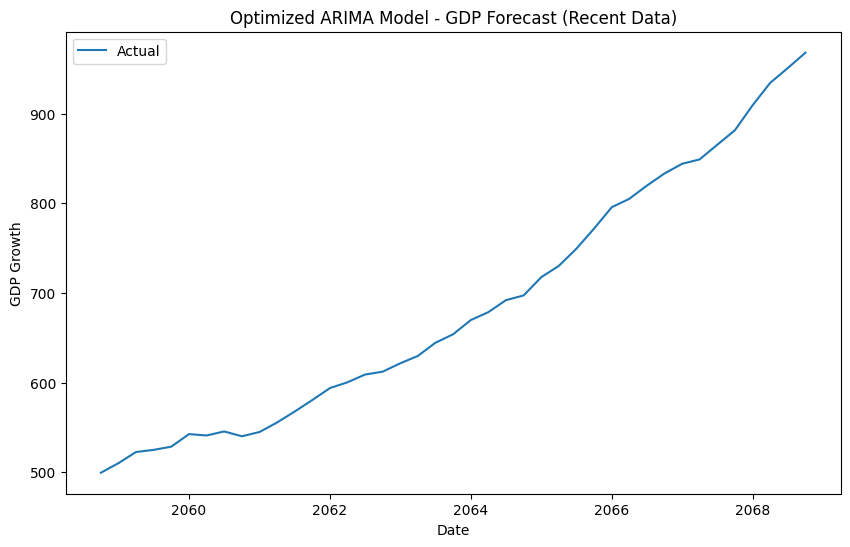

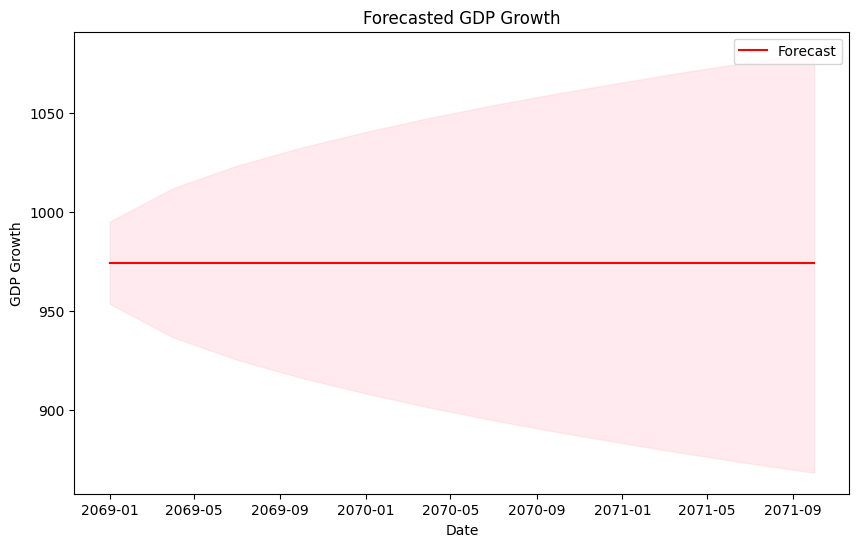

In [ ]:
# Import the necessary libraries
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Load the merged dataset
data = pd.read_csv('merged_economic_data.csv')  # Replace with your merged file path

# Convert the 'date' column to datetime format
data['date'] = pd.to_datetime(data['date'], format='%m/%d/%y')

# Sort the dataset by date to ensure it is monotonic
data.sort_values('date', inplace=True)

# Set the 'date' column as the index
data.set_index('date', inplace=True)

# Limit the dataset to the most recent 10 years for faster execution (adjust as necessary)
recent_data = data.loc[data.index >= data.index[-1] - pd.DateOffset(years=10)]

# Infer and set the frequency if possible
recent_data = recent_data.asfreq(pd.infer_freq(recent_data.index))

# Fill missing values in the dataset using interpolation
recent_data.interpolate(method='linear', inplace=True)

# Select the target variable (e.g., GDP) and optionally any other variables as exogenous variables
target = 'GDP_growth'
# Note: For simplicity, we run ARIMA without exogenous variables
y = recent_data[target]

# Fit a very simple ARIMA model (ARIMA(0, 1, 1)) for faster execution
arima_model = ARIMA(y, order=(0, 1, 1))
arima_result = arima_model.fit()

# Print the model summary
print(arima_result.summary())

# Forecast future values
forecast_steps = 12  # Forecast for the next 12 periods (e.g., quarters)
forecast = arima_result.get_forecast(steps=forecast_steps)
forecast_ci = forecast.conf_int()

# Plot the actual values
plt.figure(figsize=(10, 6))
plt.plot(y, label='Actual')
plt.title('Optimized ARIMA Model - GDP Forecast (Recent Data)')
plt.xlabel('Date')
plt.ylabel('GDP Growth')
plt.legend()
plt.show()

# Plot the forecast separately for better visibility
plt.figure(figsize=(10, 6))
plt.plot(forecast.predicted_mean, label='Forecast', color='red')
plt.fill_between(forecast_ci.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='pink', alpha=0.3)
plt.title('Forecasted GDP Growth')
plt.xlabel('Date')
plt.ylabel('GDP Growth')
plt.legend()
plt.show()
